# Ellipticity of figure
Ellipticity corrections for seismic phases require the determination of the ellipticity of figure ($\epsilon$) for the planet. In the package this is performed using a simple first-order approach, assuming hydrostatic equilibrium and solving Clairaut’s equation with the Darwin-Radau approximation. This notebook illustrates the ellipticity of figure that is calculated. Users of the package will not need to directly use the routines below unless they are specifically interested in particular values of the ellipticity of figure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from obspy.taup import TauPyModel
from ellipticipy.tools import model_epsilon, get_epsilon

The calculation requires a model for the interior density as a function of depth. Here we take PREM as our model. The function `model_epsilon` performs the integration and adds values of the ellipticity of figure ($\epsilon$) as attributes to the `TauModel` object.

In [2]:
model = TauPyModel("prem").model  # obtain TauModel from TauPyModel
model_epsilon(model)

Once the `model_epsilon` routine has been called, values of the ellipticity of figure ($\epsilon$) at any depth can be obtained from the `get_epsilon` routine. This routine uses linear interpolation across each layer in the `TauModel`. Here we plot a profile of the ellipticity of figure through the planet.

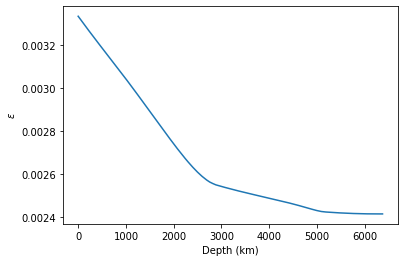

In [3]:
depth = np.linspace(0.0, model.radius_of_planet, 200)
epsilon = get_epsilon(model, depth)
plt.plot(depth, epsilon)
plt.xlabel("Depth (km)")
plt.ylabel("$\epsilon$");

## Surface values

In [4]:
surface_epsilon = get_epsilon(model, 0.0)
print("surface_epsilon:", surface_epsilon[0])
print("reciprocal:", 1.0 / surface_epsilon[0])

surface_epsilon: 0.003334508214443187
reciprocal: 299.8942979563135


Earth's actual surface topography has an observed ellipticity of figure $\epsilon = 1/298.3$, within about 0.5% of the value calculated using the first-order hydrostatic model here.

## Core - mantle boundary values 

In [5]:
cmb_epsilon = get_epsilon(model, model.cmb_depth)
print("cmb_epsilon:", cmb_epsilon[0])
print("reciprocal:", 1.0 / cmb_epsilon[0])

cmb_epsilon: 0.00254835971005391
reciprocal: 392.4092803911287


## Inner core - outer core boundary values

In [6]:
iocb_epsilon = get_epsilon(model, model.iocb_depth)
print("iocb_epsilon:", iocb_epsilon[0])
print("reciprocal:", 1.0 / iocb_epsilon[0])

iocb_epsilon: 0.0024230268297030836
reciprocal: 412.70694477722293


## Centre of planet values

In [7]:
centre_epsilon = get_epsilon(model, model.radius_of_planet)
print("centre_epsilon:", centre_epsilon[0])
print("reciprocal:", 1.0 / centre_epsilon[0])

centre_epsilon: 0.0024135634155963833
reciprocal: 414.3251399727168


There exist more sophisticated models of Earth's ellipticity of figure, but the simple first-order hydrostatic approach taken here should yield sufficient accuracy for ellipticity corrections for seismic phases.